In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt 
%matplotlib inline 
import matplotlib 
matplotlib.style.use('seaborn') 

In [3]:
###한글 폰트###
from matplotlib import rcParams
from matplotlib import font_manager, rc

rcParams['axes.unicode_minus'] = False
#plt.rcParams['font.family'] = 'Malgun Gothic'

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [4]:
pd.options.display.float_format = '{:,.1f}'.format

In [5]:
df = pd.read_csv("household_2020a.csv")

In [6]:
df.tail()

,year,metro,id,sex,age,number,education,marriage,asset,debt,income,income_d,industry,job,house
18059,2020,G2,993800291,1,42,3,6,2,6705,2200,179,-390,NaN,NaN,3
18060,2020,G2,994800251,1,49,5,6,2,130180,22000,15454,11784,O,3,1
18061,2020,G2,994800261,1,57,5,6,2,265226,29000,15098,11560,NaN,NaN,1
18062,2020,G2,994800291,2,53,2,7,4,109695,25000,9114,7074,O,2,2
18063,2020,G2,995800261,1,44,5,6,2,71223,13000,7857,5404,C,3,1


남녀성비와 직업은 독립인가?

In [7]:
df1 = df[["sex", "job"]]

In [8]:
df1 = df1.dropna()

In [9]:
df1.tail()

,sex,job
18056,1,4
18058,1,2
18060,1,3
18062,2,2
18063,1,3


In [10]:
df2 = df1.drop(df1[(df1.job=="A")].index)

### 귀무가설 : 남녀간 직업의 차이는 독립이다(우연에 지나지 않는다.)
### 대립가설 : 남녀간 직업의 차이는 관계가 있다.(실질적인 차이가 있다.)

## 1. 관측 도수

In [11]:
cross_tab1 = pd.crosstab(df2.sex, df2.job, margins = True)

In [12]:
cross_tab1

job,1,2,3,4,5,6,7,8,9,All
sex,,,,,,,,,,
1,316,1623,1644,558,882,1020,1379,1832,1318,10572
2,12,420,315,601,323,197,76,87,586,2617
All,328,2043,1959,1159,1205,1217,1455,1919,1904,13189


In [13]:
 cross_tab1.iloc[2, 9]

13189

In [14]:
cross_tab10 = pd.crosstab(df2.sex, df2.job, margins = True)

In [15]:
num_rows = cross_tab10.shape[0]
num_cols = cross_tab10.shape[1]

In [16]:
cross_tab10

job,1,2,3,4,5,6,7,8,9,All
sex,,,,,,,,,,
1,316,1623,1644,558,882,1020,1379,1832,1318,10572
2,12,420,315,601,323,197,76,87,586,2617
All,328,2043,1959,1159,1205,1217,1455,1919,1904,13189


In [17]:
for i in range(num_rows):
    for j in range(num_cols):
        cross_tab10.iloc[i,j] = (cross_tab1.iloc[i, j]/ cross_tab1.iloc[i, 9])*100 

In [18]:
cross_tab10

job,1,2,3,4,5,6,7,8,9,All
sex,,,,,,,,,,
1,3.0,15.4,15.6,5.3,8.3,9.6,13.0,17.3,12.5,100
2,0.5,16.0,12.0,23.0,12.3,7.5,2.9,3.3,22.4,100
All,2.5,15.5,14.9,8.8,9.1,9.2,11.0,14.6,14.4,100


## 2. 추정되는 기대 도수

In [19]:
cross_tab1.columns

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', 'All'], dtype='object', name='job')

In [20]:
cross_tab1.index

Index([1, 2, 'All'], dtype='object', name='sex')

In [21]:
tot = cross_tab1.iloc[-1, -1]

In [22]:
tot

13189

In [23]:
j_1 = cross_tab1.iloc[-1, 0]
j_2 = cross_tab1.iloc[-1, 1]
j_3 = cross_tab1.iloc[-1, 2]
j_4 = cross_tab1.iloc[-1, 3]
j_5 = cross_tab1.iloc[-1, 4]
j_6 = cross_tab1.iloc[-1, 5]
j_7 = cross_tab1.iloc[-1, 6]
j_8 = cross_tab1.iloc[-1, 7]
j_9 = cross_tab1.iloc[-1, 8]

In [24]:
j_1

328

In [25]:
j_2

2043

In [26]:
s_1 = cross_tab1.iloc[0, -1]
s_2 = cross_tab1.iloc[1, -1]

In [27]:
s_1

10572

In [28]:
s_2

2617

In [29]:
p_j1 = j_1 / tot
p_j2 = j_2 / tot
p_j3 = j_3 / tot
p_j4 = j_4 / tot
p_j5 = j_5 / tot
p_j6 = j_6 / tot
p_j7 = j_7 / tot
p_j8 = j_8 / tot
p_j9 = j_9 / tot

In [30]:
p_j1

0.024869209189476077

In [31]:
p_s1 = s_1 / tot
p_s2 = s_2 / tot

In [32]:
p_s1

0.8015770718022595

In [33]:
p_s2

0.19842292819774054

In [34]:
p_j1*p_s1

0.019934587880138077

In [35]:
p_j1*p_s1*tot

262.9172795511411

In [36]:
cross_tab2 = pd.crosstab(df2.sex, df2.job, margins = True)

In [37]:
cross_tab2

job,1,2,3,4,5,6,7,8,9,All
sex,,,,,,,,,,
1,316,1623,1644,558,882,1020,1379,1832,1318,10572
2,12,420,315,601,323,197,76,87,586,2617
All,328,2043,1959,1159,1205,1217,1455,1919,1904,13189


In [38]:
cross_tab2

job,1,2,3,4,5,6,7,8,9,All
sex,,,,,,,,,,
1,316,1623,1644,558,882,1020,1379,1832,1318,10572
2,12,420,315,601,323,197,76,87,586,2617
All,328,2043,1959,1159,1205,1217,1455,1919,1904,13189


In [39]:
cross_tab2.iloc[0, 0] = tot * p_s1*p_j1
cross_tab2.iloc[0, 1] = tot * p_s1*p_j2
cross_tab2.iloc[0, 2] = tot * p_s1*p_j3
cross_tab2.iloc[0, 3] = tot * p_s1*p_j4
cross_tab2.iloc[0, 4] = tot * p_s1*p_j5
cross_tab2.iloc[0, 5] = tot * p_s1*p_j6
cross_tab2.iloc[0, 6] = tot * p_s1*p_j7
cross_tab2.iloc[0, 7] = tot * p_s1*p_j8
cross_tab2.iloc[0, 8] = tot * p_s1*p_j9
cross_tab2.iloc[0, 9] = sum(cross_tab2.iloc[0, 0:9])

In [40]:
cross_tab2.iloc[1, 0] = tot * p_s2*p_j1
cross_tab2.iloc[1, 1] = tot * p_s2*p_j2
cross_tab2.iloc[1, 2] = tot * p_s2*p_j3
cross_tab2.iloc[1, 3] = tot * p_s2*p_j4
cross_tab2.iloc[1, 4] = tot * p_s2*p_j5
cross_tab2.iloc[1, 5] = tot * p_s2*p_j6
cross_tab2.iloc[1, 6] = tot * p_s2*p_j7
cross_tab2.iloc[1, 7] = tot * p_s2*p_j8
cross_tab2.iloc[1, 8] = tot * p_s2*p_j9
cross_tab2.iloc[1, 9] = sum(cross_tab2.iloc[1, 0:9])

In [41]:
#cross_tab2.iloc[2, 0] = cross_tab2.iloc[0, 0] + cross_tab2.iloc[1, 0]
#cross_tab2.iloc[2, 1] = cross_tab2.iloc[0, 1] + cross_tab2.iloc[1, 1]

In [42]:
cross_tab2

job,1,2,3,4,5,6,7,8,9,All
sex,,,,,,,,,,
1,262.9,"1,637.6","1,570.3",929.0,965.9,975.5,"1,166.3","1,538.2","1,526.2",10572
2,65.1,405.4,388.7,230.0,239.1,241.5,288.7,380.8,377.8,2617
All,328.0,"2,043.0","1,959.0","1,159.0","1,205.0","1,217.0","1,455.0","1,919.0","1,904.0",13189


## 3. 관측된 도수와 기대되는 도수와의 차이

In [43]:
cross_tab3 = pd.crosstab(df2.sex, df2.job, margins = True)

In [44]:
cross_tab3.shape

(3, 10)

In [45]:
num_rows = cross_tab3.shape[0]
num_cols = cross_tab3.shape[1]

In [46]:
for i in range(num_rows):
    for j in range(num_cols):
        cross_tab3.iloc[i,j] = (cross_tab1.iloc[i, j] - cross_tab2.iloc[i, j]) 

In [47]:
cross_tab3

job,1,2,3,4,5,6,7,8,9,All
sex,,,,,,,,,,
1,53.1,-14.6,73.7,-371.0,-83.9,44.5,212.7,293.8,-208.2,0
2,-53.1,14.6,-73.7,371.0,83.9,-44.5,-212.7,-293.8,208.2,0
All,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


### 4. 관측된 도수와 기대되는 도수와의 차이가 우연인가 아니면 실질적인가?

In [48]:
t00 = (cross_tab1.iloc[0, 0] - cross_tab2.iloc[0, 0]) ** 2 / cross_tab2.iloc[0, 0]

In [49]:
t00

10.717345071660116

In [50]:
chi_square=[]

for i in range(num_rows-1):
    for j in range(num_cols-1):
        t = (cross_tab1.iloc[i, j] - cross_tab2.iloc[i, j]) ** 2 / cross_tab2.iloc[i, j]
        chi_square.append(t)


In [51]:
chi_square

[10.717345071660116,
 0.1305561675836542,
 3.4600245849900175,
 148.17817501651206,
 7.287783035421257,
 2.0281843747914694,
 38.792573390970425,
 56.10547806838891,
 28.40276827938545,
 43.29528929980533,
 0.5274129933872262,
 13.977600272263924,
 598.6013245221882,
 29.440749809122423,
 8.193337871721615,
 156.71191665622456,
 226.65155297631145,
 114.73980368729964]

In [52]:
test_value =round(sum(chi_square), 2)
test_value

1487.24

In [59]:
DoF = (num_rows-1)*(num_cols-1)

In [61]:
DoF

18

In [62]:
from scipy.stats import chi2
import scipy.stats as stats
import matplotlib.pyplot as plt

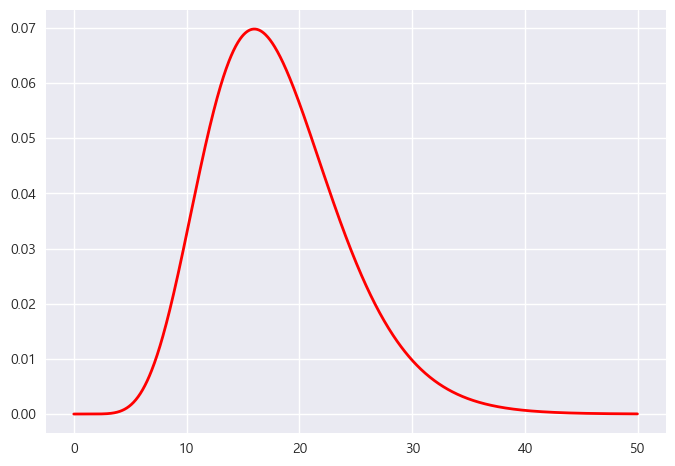

In [65]:
x = np.arange(0, 50, .05)
plt.plot(x, stats.chi2.pdf(x, df=DoF), color='r', lw=2)
plt.show()

In [66]:
p_values = 1 - stats.chi2.cdf(test_value, DoF)

In [67]:
p_values

0.0